# Gammatone filter

Gammatone filter impulse response

In [1]:
import phd
import numpy as np
from brian import *
import seaborn as sns
from brian.hears import *
import matplotlib.pyplot as plt

In [2]:
def IR(f,t,order,b):
    erb_f = 24.7 + 0.108*f
    ir = np.power(t,order-1)*np.exp(-2*np.pi*b*erb_f*t)*np.cos(2*np.pi*f*t)
    return ir

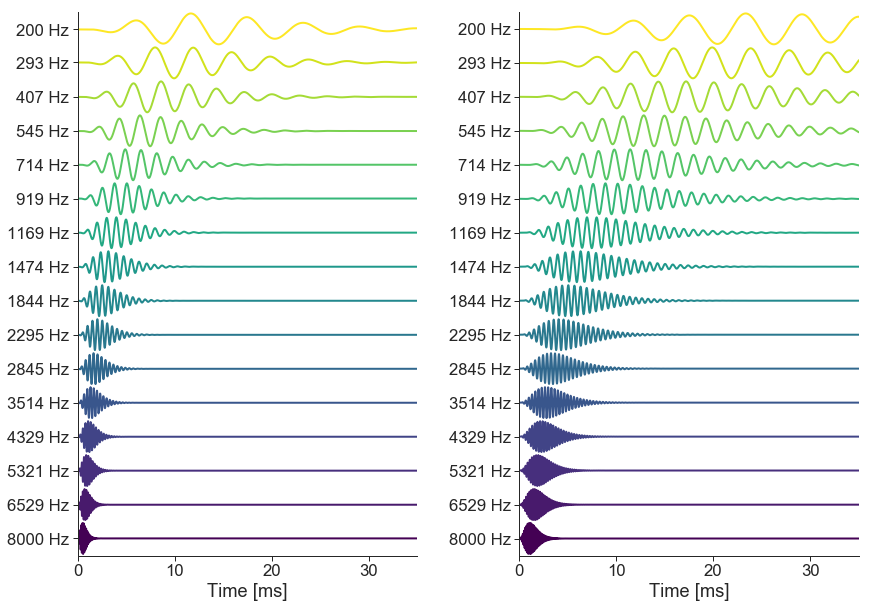

In [4]:
# setting plots
phd.plots.setup(figsize=(14, 10))
sns.set_style({"axes.spines.top": False})
sns.set_style({"axes.spines.right": False})
sns.set_context("paper",font_scale=1.9, rc={"lines.linewidth": 2})

nbr_center_frequencies = 16
fig, axs = plt.subplots(nbr_center_frequencies,2)
plt.subplots_adjust(hspace=0,wspace=0.3)
freqs = erbspace(200*Hz, 8*kHz, nbr_center_frequencies)
t = np.linspace(0, 0.06, 5000)

clrs = np.flipud(plt.cm.viridis(np.linspace(0,1,nbr_center_frequencies)))
b=1.019
b2=0.5

for i in range(len(freqs)-1):
    axs[i,0].plot(t,IR(freqs[i],t,4,b),color=clrs[i])
    axs[i,0].set_yticks([0])
    axs[i,0].set_yticklabels(['%d Hz'%np.round(freqs[i])])
    axs[i,0].set_xticks([])
    axs[i,0].set_xlim([0,0.03])
    axs[i,0].spines['bottom'].set_visible(False)

axs[-1,0].plot(t,IR(freqs[-1],t,4,b),color=clrs[-1])
axs[-1,0].set_xlim([0,0.035])
axs[-1,0].set_yticks([])
axs[-1,0].set_yticks([0])
axs[-1,0].set_xticklabels((axs[-1,0].get_xticks()*1000).astype(int))
axs[-1,0].set_yticklabels(['%d Hz'%np.round(freqs[-1])])
axs[-1,0].set_xlabel('Time [ms]')


for i in range(len(freqs)-1):
    axs[i,1].plot(t,IR(freqs[i],t,4,b2),color=clrs[i])
    axs[i,1].set_yticks([0])
    axs[i,1].set_yticklabels(['%d Hz'%np.round(freqs[i])])
    axs[i,1].set_xticks([])
    axs[i,1].set_xlim([0,0.03])
    axs[i,1].spines['bottom'].set_visible(False)    
    
axs[-1,1].plot(t,IR(freqs[-1],t,4,b2),color=clrs[-1])
axs[-1,1].set_xlim([0,0.035])
axs[-1,1].set_yticks([])
axs[-1,1].set_yticks([0])
axs[-1,1].set_xticklabels((axs[-1,1].get_xticks()*1000).astype(int))
axs[-1,1].set_yticklabels(['%d Hz'%np.round(freqs[-1])])
axs[-1,1].set_xlabel('Time [ms]')


fig.savefig('/Volumes/LeandroLV/TFM/Thesis/Figures/methods/GammatoneIRbandb2V2.svg', bbox_inches='tight', format='svg')